# Introduction to Regression and Classification

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

In [3]:
budget = np.array([5, 10, 17, 27, 35, 40, 42, 49, 54, 60])
revenue = np.array([2.6, 19. , 23.8, 26.9, 41.1, 58.3, 40.3, 58.7, 73.1, 69.7])

In [4]:
df = pd.DataFrame(data = {"revenue": revenue, "budget": budget})

In [6]:
plt.rcdefaults()

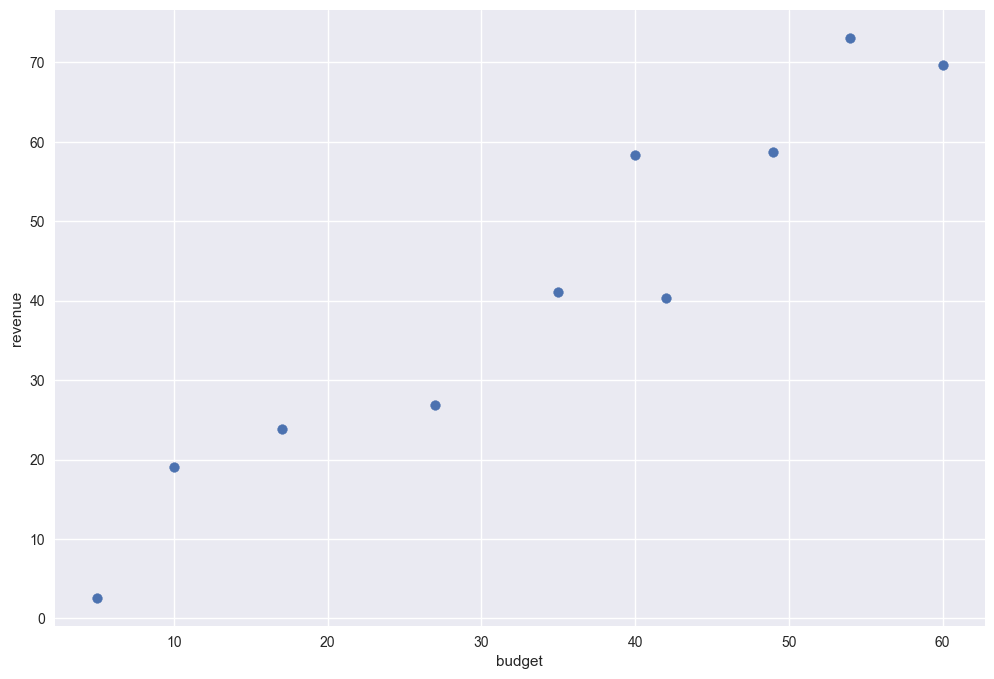

In [10]:
plt.figure(figsize= (12, 8))
plt.scatter(x = df.budget, y= df.revenue)
plt.xlabel("budget")
plt.ylabel("revenue")
plt.show()

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
lm = LinearRegression(fit_intercept= True)

In [13]:
lm.fit(X = df.budget.to_frame(), y= df.revenue)

LinearRegression()

In [14]:
slope = lm.coef_
slope

array([1.19897684])

In [15]:
intercept = lm.intercept_
intercept

0.7046849757673712

In [18]:
df["Pred"] = lm.predict(df.budget.to_frame())

In [19]:
df

,revenue,budget,Pred
0,2.6,5,6.699569
1,19.0,10,12.694453
2,23.8,17,21.087291
3,26.9,27,33.077060
4,41.1,35,42.668875
5,58.3,40,48.663759
6,40.3,42,51.061712
7,58.7,49,59.454550
8,73.1,54,65.449435
9,69.7,60,72.643296


In [20]:
x_lin = np.array([0, 100])
y_lin = intercept + slope * x_lin

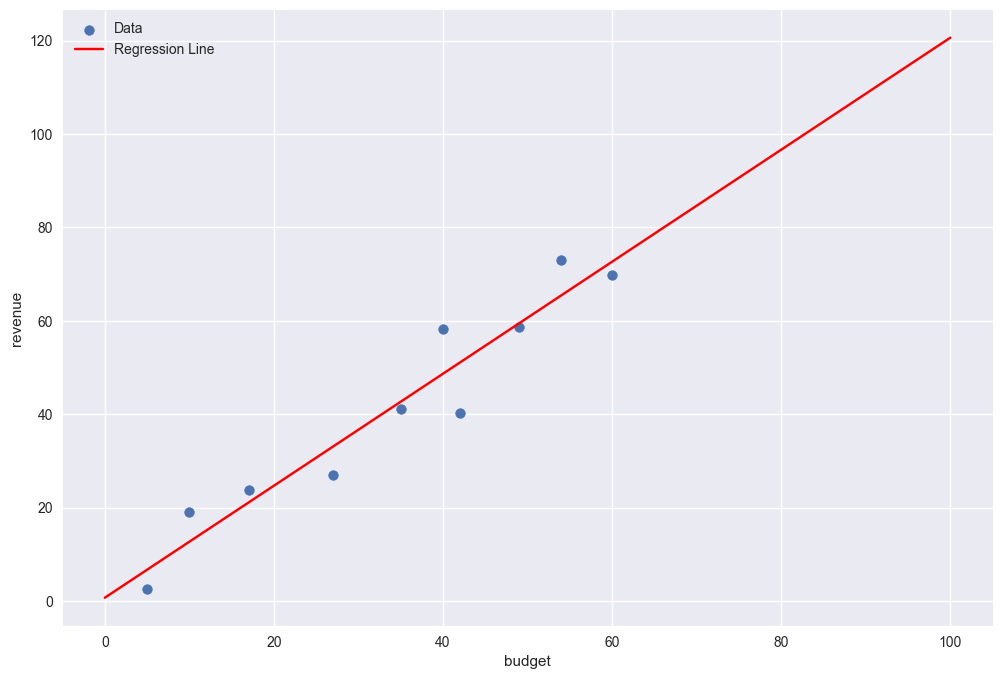

In [30]:
plt.figure(figsize= (12, 8))
plt.scatter(x = df.budget, y= df.revenue, s= 50, label = "Data")
plt.plot(x_lin, y_lin, c= "red", label = "Regression Line")
plt.xlabel("budget")
plt.ylabel("revenue")
plt.legend()
plt.show()

# Predictions

In [31]:
budget_new = np.array([63, 66, 74, 80, 85])
revenue_new = np.array([74.2,  80.7, 98.2,  94.8, 101.7]) 

In [32]:
df_new = pd.DataFrame(data= {"revenue": revenue_new, "budget": budget_new})
df_new

,revenue,budget
0,74.2,63
1,80.7,66
2,98.2,74
3,94.8,80
4,101.7,85


In [34]:
df_new["Pred"] = lm.predict(df_new.budget.to_frame())

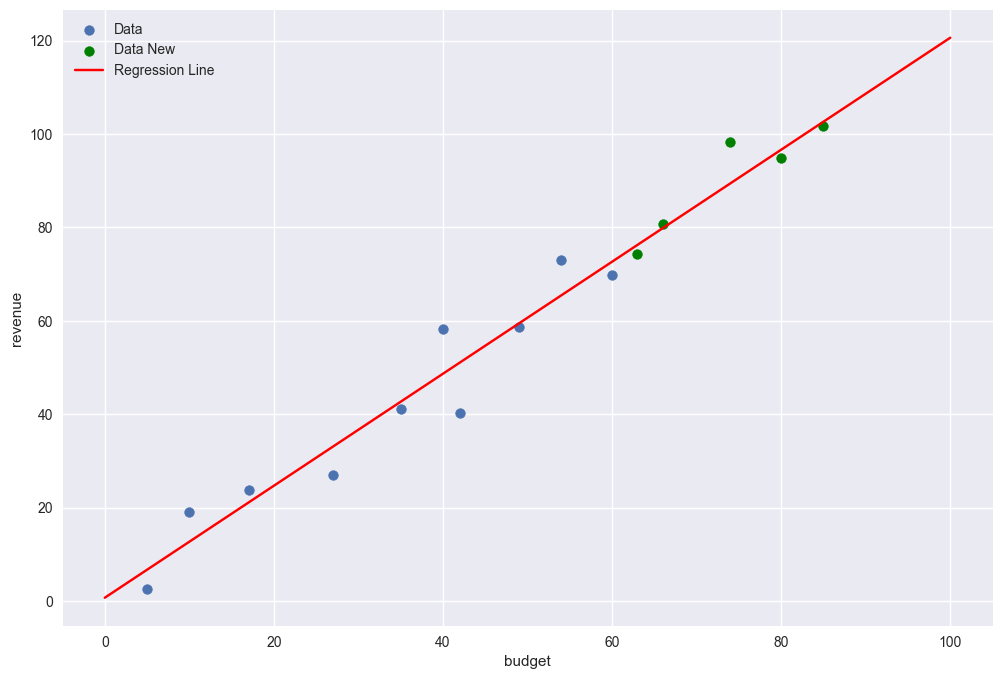

In [36]:
plt.figure(figsize= (12, 8))
plt.scatter(x = df.budget, y= df.revenue, s= 50, label = "Data")
plt.scatter(x = df_new.budget, y= df_new.revenue, s= 50, label = "Data New", c = "Green")
plt.plot(x_lin, y_lin, c= "red", label = "Regression Line")
plt.xlabel("budget")
plt.ylabel("revenue")
plt.legend()
plt.show()

# Overfitting

In [57]:
poly_m = np.polyfit(x = df.budget, y = df.revenue, deg= 9)

In [58]:
poly_m

array([ 2.31988761e-09, -6.91663856e-07,  8.80409587e-05, -6.24271101e-03,
        2.69731803e-01, -7.29512945e+00,  1.21996447e+02, -1.19724559e+03,
        6.13254339e+03, -1.21710591e+04])

In [59]:
x_poly = np.linspace(0,100,1000)

In [60]:
y_poly = np.polyval(poly_m, x_poly)

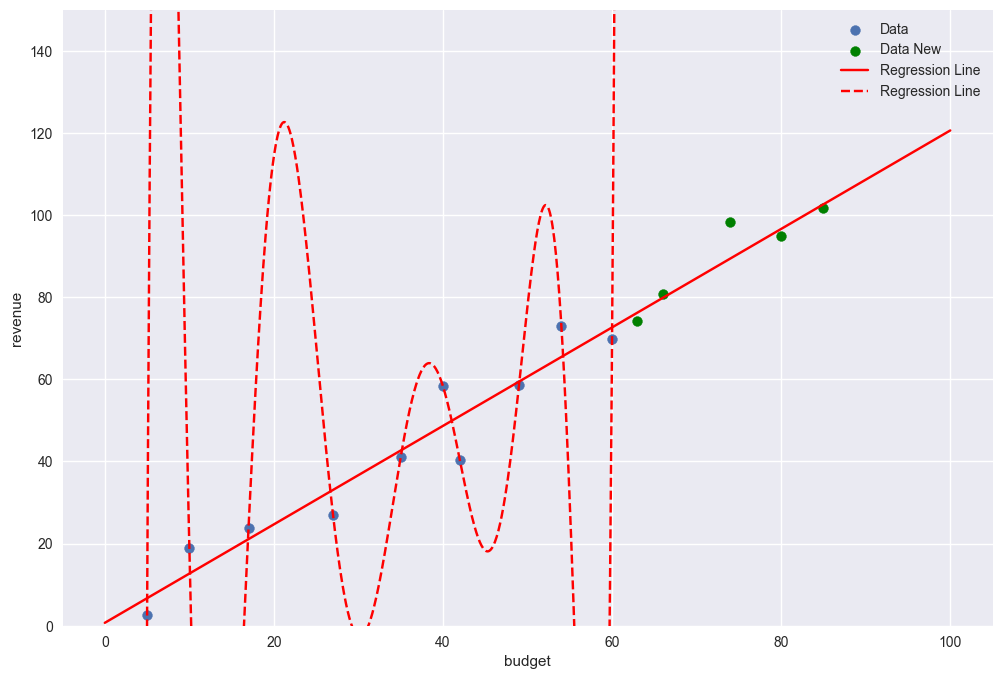

In [61]:
plt.figure(figsize= (12, 8))
plt.scatter(x = df.budget, y= df.revenue, s= 50, label = "Data")
plt.scatter(x = df_new.budget, y= df_new.revenue, s= 50, label = "Data New", c = "Green")
plt.plot(x_lin, y_lin, c= "red", label = "Regression Line")
plt.plot(x_poly, y_poly, c= "red", label = "Regression Line", linestyle = "--")
plt.xlabel("budget")
plt.ylabel("revenue")
plt.legend()
plt.ylim(0, 150)
plt.show()

# Logistic regression wit scikit

In [62]:
hours = np.array([0.5, 0.75, 1., 1.25, 1.5, 1.75, 1.75, 2.,
                  2.25, 2.5, 2.75, 3., 3.25, 3.5, 4., 4.25,
                  4.5, 4.75, 5., 5.5])

success = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1]) 

In [66]:
data = pd.DataFrame(data = {"hours": hours, "success": success})
data.head()


,hours,success
0,0.50,0
1,0.75,0
2,1.00,0
3,1.25,0
4,1.50,0


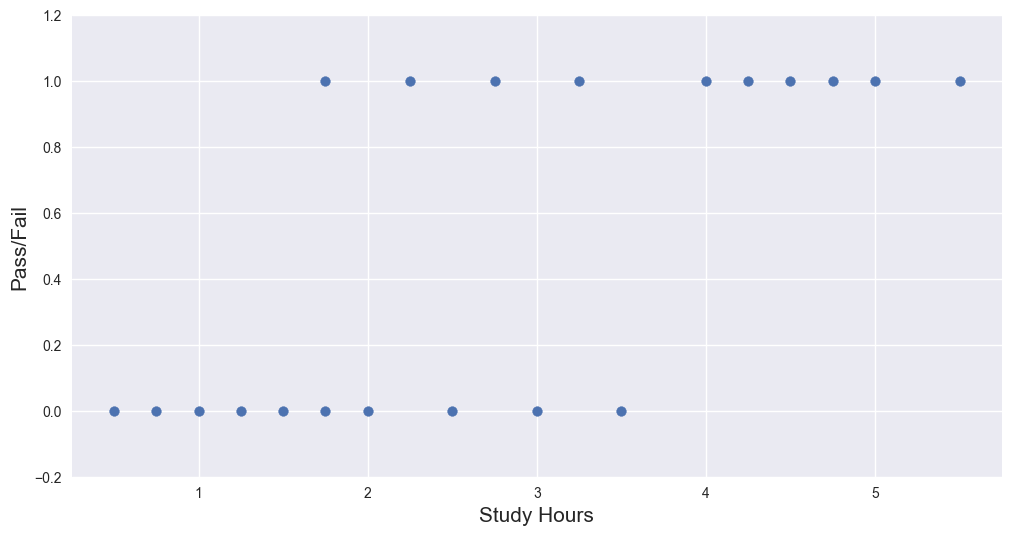

In [64]:
plt.figure(figsize= (12, 6))
plt.scatter(hours, success)
plt.xlabel("Study Hours", fontsize = 15)
plt.ylabel("Pass/Fail", fontsize = 15)
plt.ylim(-0.2, 1.2)
plt.show()

In [67]:
from sklearn.linear_model import LinearRegression

In [68]:
lm = LinearRegression(fit_intercept= True)

In [72]:
lm.fit(X=data.hours.to_frame(), y= data.success)

LinearRegression()

In [73]:
lm.coef_

array([0.23459561])

In [74]:
lm.intercept_

-0.15393526898848708

In [76]:
data["pred"] = lm.predict(X = data.hours.to_frame())

In [77]:
data

,hours,success,pred
0,0.50,0,-0.036637
1,0.75,0,0.022011
2,1.00,0,0.080660
3,1.25,0,0.139309
4,1.50,0,0.197958
5,1.75,0,0.256607
6,1.75,1,0.256607
7,2.00,0,0.315256
8,2.25,1,0.373905
9,2.50,0,0.432554


### Model regresli liniowej CZERWONY nie jest nalepszy do tego typu rzeczy (KLASYFIKACJI)

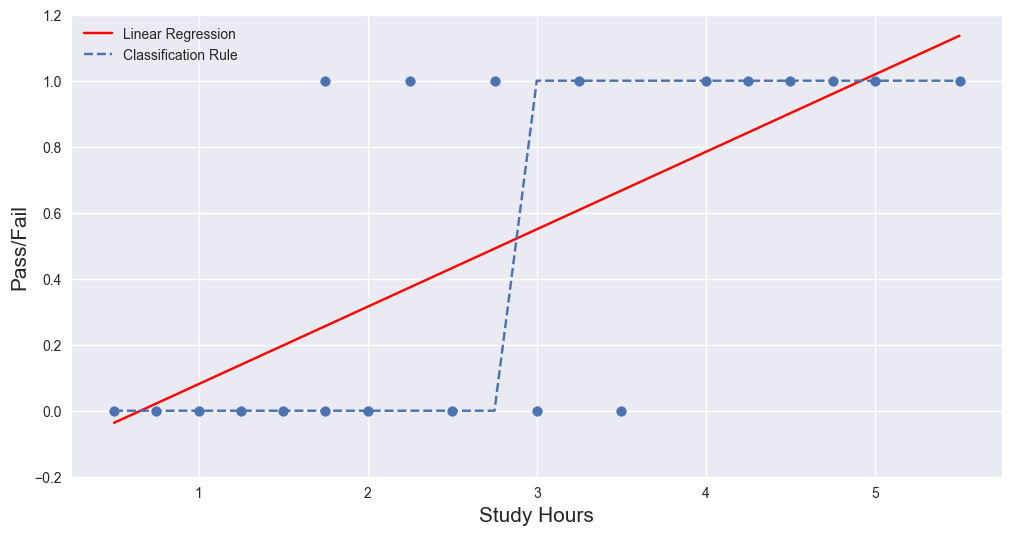

In [84]:
plt.figure(figsize= (12, 6))
plt.scatter(hours, success)
plt.plot(hours, data.pred, color = "red", label = "Linear Regression")
plt.plot(data.hours, np.where(data.pred > 0.5, 1, 0), linestyle= "--", label = "Classification Rule")
plt.xlabel("Study Hours", fontsize = 15)
plt.ylabel("Pass/Fail", fontsize = 15)
plt.ylim(-0.2, 1.2)
plt.legend()
plt.show()

In [85]:
from sklearn.linear_model import LogisticRegression

In [86]:
lm = LogisticRegression()

In [87]:
lm.fit(X = data.hours.to_frame(), y = data.success)

LogisticRegression()

In [89]:
data["pred"] = lm.predict(X=data.hours.to_frame())

In [90]:
data

,hours,success,pred
0,0.50,0,0
1,0.75,0,0
2,1.00,0,0
3,1.25,0,0
4,1.50,0,0
5,1.75,0,0
6,1.75,1,0
7,2.00,0,0
8,2.25,1,0
9,2.50,0,0


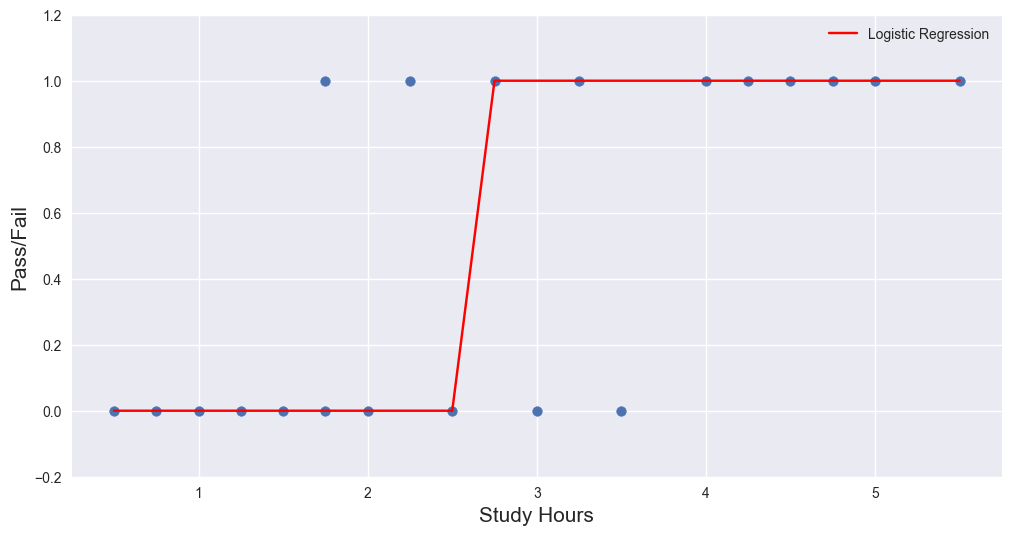

In [92]:
plt.figure(figsize= (12, 6))
plt.scatter(hours, success)
plt.plot(hours, data.pred, color = "red", label = "Logistic Regression")
plt.xlabel("Study Hours", fontsize = 15)
plt.ylabel("Pass/Fail", fontsize = 15)
plt.ylim(-0.2, 1.2)
plt.legend()
plt.show()

In [94]:
proba = lm.predict_proba(data.hours.to_frame())
proba

array([[0.92858952, 0.07141048],
       [0.90704455, 0.09295545],
       [0.87984046, 0.12015954],
       [0.84602638, 0.15397362],
       [0.80480773, 0.19519227],
       [0.75574059, 0.24425941],
       [0.75574059, 0.24425941],
       [0.69895285, 0.30104715],
       [0.63533317, 0.36466683],
       [0.56660539, 0.43339461],
       [0.49521602, 0.50478398],
       [0.42402118, 0.57597882],
       [0.3558463 , 0.6441537 ],
       [0.29305565, 0.70694435],
       [0.18924992, 0.81075008],
       [0.14905371, 0.85094629],
       [0.11617173, 0.88382827],
       [0.08977835, 0.91022165],
       [0.06891381, 0.93108619],
       [0.04000986, 0.95999014]])

In [100]:
proba[:,0]

array([0.92858952, 0.90704455, 0.87984046, 0.84602638, 0.80480773,
       0.75574059, 0.75574059, 0.69895285, 0.63533317, 0.56660539,
       0.49521602, 0.42402118, 0.3558463 , 0.29305565, 0.18924992,
       0.14905371, 0.11617173, 0.08977835, 0.06891381, 0.04000986])

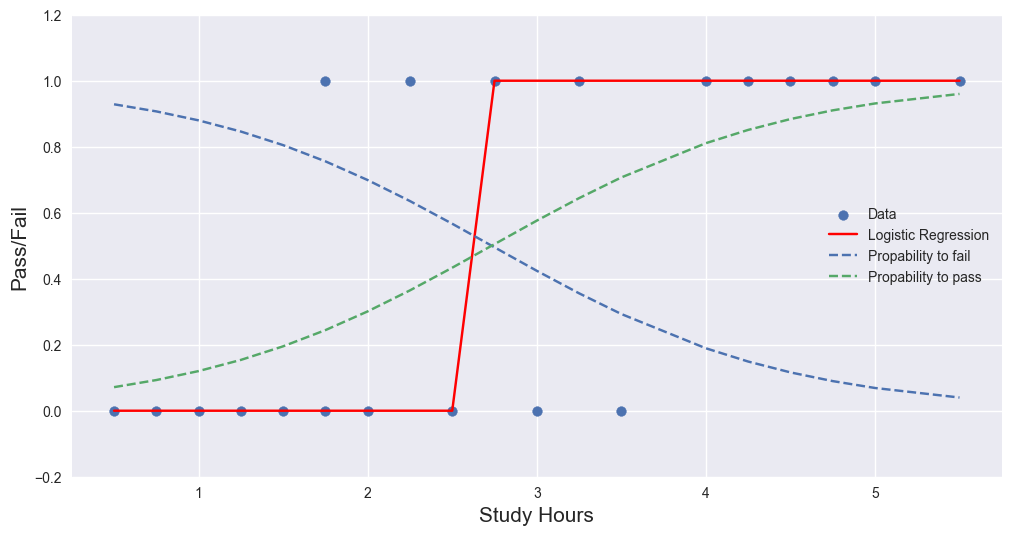

In [103]:
plt.figure(figsize= (12, 6))
plt.scatter(hours, success, label = "Data")
plt.plot(hours, data.pred, color = "red", label = "Logistic Regression")
plt.plot(hours, proba[:,0], linestyle = "--", label = "Propability to fail")
plt.plot(hours, proba[:,1], linestyle = "--", label = "Propability to pass")
plt.xlabel("Study Hours", fontsize = 15)
plt.ylabel("Pass/Fail", fontsize = 15)
plt.ylim(-0.2, 1.2)
plt.legend()
plt.show()